# ASSIGNMENT 1-2

In [1]:
%matplotlib widget

In [2]:
import torch
import matplotlib.pyplot as plt

<img src="img/assign-1/assign_1-2.png" alt="alt text" style="width:15cm;"/>

In [ ]:
# initialize matP and mat R
matP = torch.zeros(10,10,2)
matR = torch.zeros(10,10,2) # for simplicity reward in state where action is not applicable is set to 0 (it is not general)

# initialize matP for a1 and a2
tmpP1 = torch.zeros(10,10)
tmpP2 = torch.zeros(10,10)

# compute mat P for a1
for i in range(10):
    if i == 0:
        tmpP1[i, i] = 0.1
        tmpP1[i, i+1] = 0.9
    elif i == 9:
        tmpP1[i, i-1] = 0.05
        tmpP1[i, i] = 0.95
    else:
        tmpP1[i, i-1] = 0.05
        tmpP1[i, i] = 0.05
        tmpP1[i, i+1] = 0.9

# compute mat P for a2
for i in range(10):
    if i == 0:
        tmpP2[i, i] = 1
    else:
        tmpP2[i, i-1] = 1

# compute matP
matP[:,:,0] = tmpP1.clone()
matP[:,:,1] = tmpP2.clone()

# compute mat R
matR[0,0,1] = 0.5
matR[9,9,0] = 1

print("State transition probability matrix for a1 is \n", tmpP1.numpy())
print("State transition probability matrix for a2 is \n", tmpP2.numpy())

print("Reward matrix for a1: \n", matR[:,:,0].numpy())
print("Reward matrix for a2: \n", matR[:,:,1].numpy())

del tmpP1, tmpP2

State transition probability matrix for a1 is 
 [[0.1  0.9  0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.05 0.05 0.9  0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.05 0.05 0.9  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.05 0.05 0.9  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.05 0.05 0.9  0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.05 0.05 0.9  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.05 0.05 0.9  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.05 0.05 0.9  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.05 0.05 0.9 ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.95]]
State transition probability matrix for a2 is 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Reward matrix for a1: 
 [[0. 0. 0. 0. 0. 0

## 2.a

<img src="img/assign-1/2-a.png" alt="alt text" style="width:15cm;"/>

## Compute exact value function (matrix form)
Bellman equation

FORMULA  
$V^{\pi} = (I - \gamma P^{\pi})^{-1}  R^{\pi}$

where  
$ P^\pi = \sum_{a} \pi\left(a|s\right) P\left(s'|s,a\right) $  
$ R^\pi =  \sum_{a} \pi\left(a|s\right) R\left(s,a\right) $

Norm error between value function computed with Bellman equation and with exact closed form
for p = 0.0, the norm error is : 0.0
for p = 0.1, the norm error is : 1.0789593e-05
for p = 0.2, the norm error is : 5.04637e-06
for p = 0.3, the norm error is : 1.9073486e-06
for p = 0.4, the norm error is : 2.6973983e-06
for p = 0.5, the norm error is : 1.2615925e-06
for p = 0.6, the norm error is : 1.6518123e-06
for p = 0.7, the norm error is : 1.009274e-05
for p = 0.8, the norm error is : 1.0789593e-05
for p = 0.9, the norm error is : 2.018548e-05
for p = 1.0, the norm error is : 1.3214499e-05


/tmp/ipykernel_3817418/551402902.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('plasma', len(pp)+5)


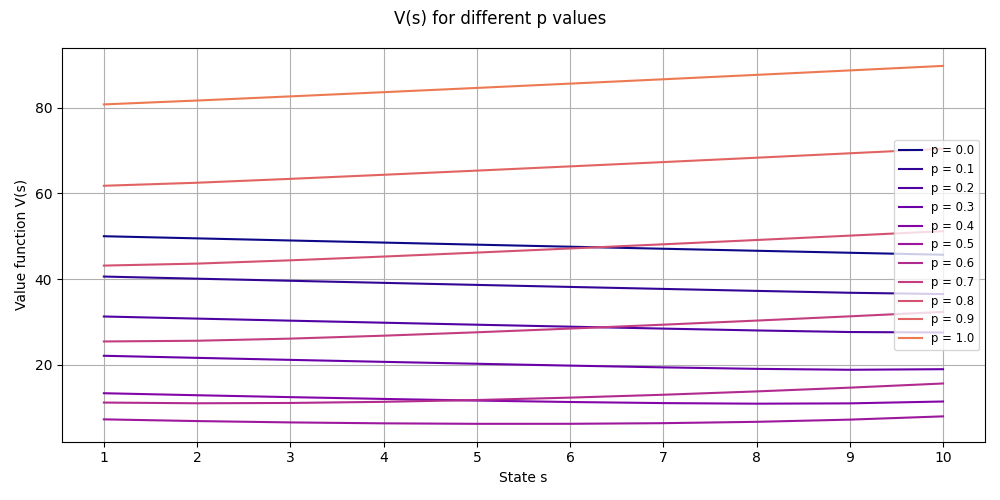

In [6]:
def compute_exact_value_function(gamma_:float, matR_:torch.Tensor, matP_:torch.Tensor, mask_pi_:torch.Tensor, vecV_list:list) -> (torch.Tensor|None):
    """ Compute the exact value function for a given gamma value """
    
    # compute value function for different gamma values
    try:
        # compute expected state transition probability
        exp_P_pi = torch.einsum('ijw,jkw->ik', mask_pi_, matP_)
        # compute expected reward
        exp_R_pi =  torch.einsum('ijw,jkw,jkw->i', mask_pi, matP, matR).view(-1,1)
        # compute value function
        vecV_pi = torch.matmul(torch.inverse(torch.eye(10) - gamma_ * exp_P_pi), exp_R_pi)
        vecV_list.append(vecV_pi)
        return vecV_pi
    except:
        # if inverse is not possible
        print(f"Inverse not possible for Gamma = {gamma_}")
        return None
        
def set_plot(ax:plt.Axes, vecV_pi:torch.Tensor, label_prefix:str, color:str):
    """ Set the plot properties """
    
    ax.plot(torch.arange(1, len(vecV_pi) + 1), vecV_pi[:,0].numpy(), label=f'{label_prefix}', color=color)
    ax.set_ylabel('Value function V(s)')
    ax.set_xlabel('State s')
    ax.set_xticks(range(1, 10 + 1))  # state values
    ax.grid(True)
    ax.legend(loc='right', fontsize='small')  # Adjust the location and font size of the legend
    
# discount factor
gamma = 0.99

# discrete p
pp = [i/10 for i in range(11)]

# useful lists
vecV_list = []

# init figure
fig1 = plt.figure(figsize=(10, 5))
ax = fig1.add_subplot(111)

# color map
cmap = plt.cm.get_cmap('plasma', len(pp)+5)


print("Norm error between value function computed with Bellman equation and with exact closed form")
for j, p in enumerate(pp):
    # mask for policy pi
    mask_pi = torch.zeros(10, 10, 2)
    torch.eye(10, 10, out=mask_pi[:,:,0])  # probability to pick a1 equal for all states
    torch.eye(10, 10, out=mask_pi[:,:,1])  # probability to pick a2 equal for all states
    mask_pi[:,:,0] = p * mask_pi[:,:,0]
    mask_pi[:,:,1] = (1 - p) * mask_pi[:,:,1]

    vecV = compute_exact_value_function(gamma, matR, matP, mask_pi, vecV_list)
    set_plot(ax, vecV, f'p = {p}', cmap(j))
    
    # compute expected reward
    # exp_PR =  torch.einsum('ijk,ijk->ijk', matP, matR)
    # exp_R_pi = torch.einsum('ijw,jkw->i', mask_pi, exp_PR).view(-1,1)
    exp_R_pi =  torch.einsum('ijw,jkw,jkw->i', mask_pi, matP, matR).view(-1,1)
    
    # compute expected value function
    exp_V_pi = torch.einsum('ijw,jkw,ks->i', mask_pi, matP, vecV).view(-1,1)
    
    V_bell = exp_R_pi + gamma * exp_V_pi
    print(f"for p = {p}, the norm error is :", torch.norm(V_bell - vecV).numpy())

fig1.suptitle('V(s) for different p values')
fig1.tight_layout()

plt.show()
del vecV, mask_pi, exp_R_pi, exp_V_pi, V_bell


With high values of p (selection of a1 is more probable), the value function increases in the state near to state_10, where is possible receive a positive reward.  
With low values of p the slope is lower with respect to high values of p, because the policy becomes deterministic (p=0) and the state_1 is an absorbing state with lower reward w.r.t. state_10.
With mid values of p, the value function has lower value function for all the states because it can be remain for more time in states where the reward is 0. 

## 2.b

<img src="img/assign-1/2-b.png" alt="alt text" style="width:15cm;"/>

with gamma =  0.99 the convergence is not obtained in 1000 iterations and norm error is:  0.0001225462183356285
Optimal action is: [0 0 0 0 0 0 0 0 0 0]
with gamma =  0.9 the convergence is obtained in 145 iterations and norm error is:  9.5367431640625e-07
Optimal action is: [1 1 1 0 0 0 0 0 0 0]


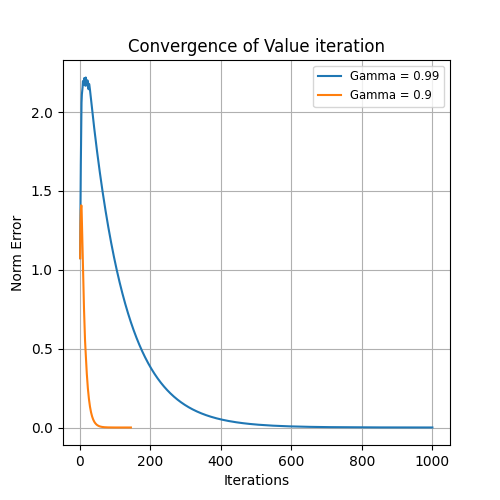

In [7]:
def value_iteration(ax_:plt.Axes, gamma_:float, matP_:torch.Tensor, matR_:torch.Tensor,  
                    epsilon_:float = 1e-6, n_iter:int = 1000):
    """ Value iteration """

    err_list = []
    V_star_pi = torch.zeros(10,1)
    V_star_pi_old = torch.zeros(10,1)

    for jj in range(n_iter):

        matR_p = torch.einsum('ijk,ijk->ik', matP_, matR_)
        
        matPV_p = torch.cat([
            torch.matmul(matP_[:, :, 0], V_star_pi), 
            torch.matmul(matP_[:, :, 1], V_star_pi), 
        ], dim=1)
        
        Q_star_pi:torch.Tensor = matR_p + gamma_ * matPV_p
        
        V_star_pi, action_ = torch.max(Q_star_pi.nan_to_num(-torch.inf), dim=1, keepdim=True)

        err = torch.norm(V_star_pi - V_star_pi_old)
        err_list.append(err)
        V_star_pi_old = V_star_pi.clone()
        
        if err < epsilon_:
            print("with gamma = ", gamma_, "the convergence is obtained in", jj+1, "iterations and norm error is: ", err.item()) 
            break
        if jj == n_iter-1:
            print("with gamma = ", gamma_, "the convergence is not obtained in", jj+1, "iterations and norm error is: ", err.item()) 

    print("Optimal action is:", action_.flatten().numpy())
    
    ax_.plot(range(1,len(err_list)+1), err_list,label=f'Gamma = {gamma_}')
    ax_.grid(True)
    ax_.legend(loc='best', fontsize='small')
    ax_.set_xlabel('Iterations')
    ax_.set_ylabel('Norm Error')
    ax_.set_title('Convergence of Value iteration')
    
    
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

for gamma_ in [0.99, 0.9]:

    value_iteration(ax, gamma_, matP, matR)

plt.show()

For lower gamma, faster convergence is obtained.  
The optimal policy for gamma 0.99 is to select always a1. The reason is that selecting a1 a higher reward in state_10 is obtained.  
The optimal policy for gamma 0.9 is to select a2 for the states near to state_0 and a1 for others.
